<img src = "Goodread.jpg" width = 500>

The second notebook titled goodreads is an analysis on a dataset of books in which I used both pie and bar charts to visualise the data and answer so particular questions which are:
Here we intend to answer these questions
1.	Top Authors based on number of books
2.	Most re- occurring books
3.	Highest ratings of books.
4.	Top books on rating counts
5.	Top books on text review


The dataset gotten from goodreads.

## Reading and Cleaning Data

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv("books.csv", error_bad_lines=False)
books.head(5)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


This gives us a basic info of the the data which are the column names and the data types attached to each column.

In [4]:
books.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

There are no null values in this dataset 

In [5]:
books.shape

(11123, 12)

In [6]:
books["authors"].unique()

array(['J.K. Rowling/Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana Falcão Bastos',
       'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

The are two J.K. Rowling here, so in other to avoid confusion when analysing, I would change all to J.K. Rowling

In [7]:
books.replace(to_replace='J.K. Rowling/Mary GrandPré',value='J.K. Rowling',inplace=True)

I changed the name of column num_pages to Total pages

In [8]:
books.rename(columns = {" num_pages":"Total_pages"}, inplace = True)

I dropped irrelevant columns(These are columsn that would not be used for analysis)

In [9]:
books.drop(['bookID', 'isbn', 'isbn13'],axis=1,inplace=True)

In [10]:
books.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

## **Data Visualisation**

Here we intend to answer these questions
1. Top Authors based on number of books
2. Most occuring books
3. Highest ratings of books.
4. Top books on rating counts
5. Top books on text reviews

We used a bar char to show the Top 15 authors here. This shows that you can also use bar chart to represent bar charts. However, they have to be grouped first using the .value_count function as shown below

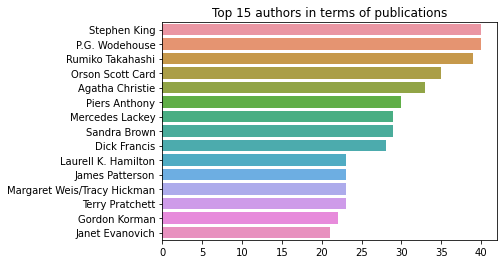

In [11]:
top_author=books['authors'].value_counts()[:15]

sns.barplot(top_author.values, top_author.index, alpha=1.).set_title('Top 15 authors in terms of publications')

plt.show()

Here is a bar chart showing the most re-occuring books

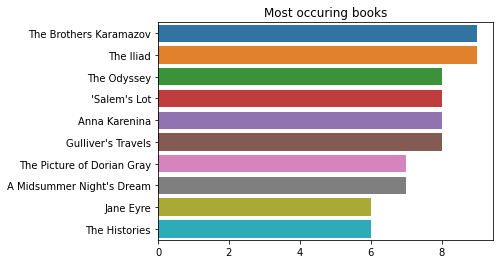

In [12]:
most_occur=books['title'].value_counts()[:10]

ax = sns.barplot(most_occur.values, most_occur.index, alpha=1.).set_title('Most occuring books')

From the bar chart above, we can see that the most re-occuring title is **The Brothers Karamazov**

These books are the books with the highest ratings all of which are suprisingly 5.0

Text(0.5, 1.0, 'Books with the Highest ratings')

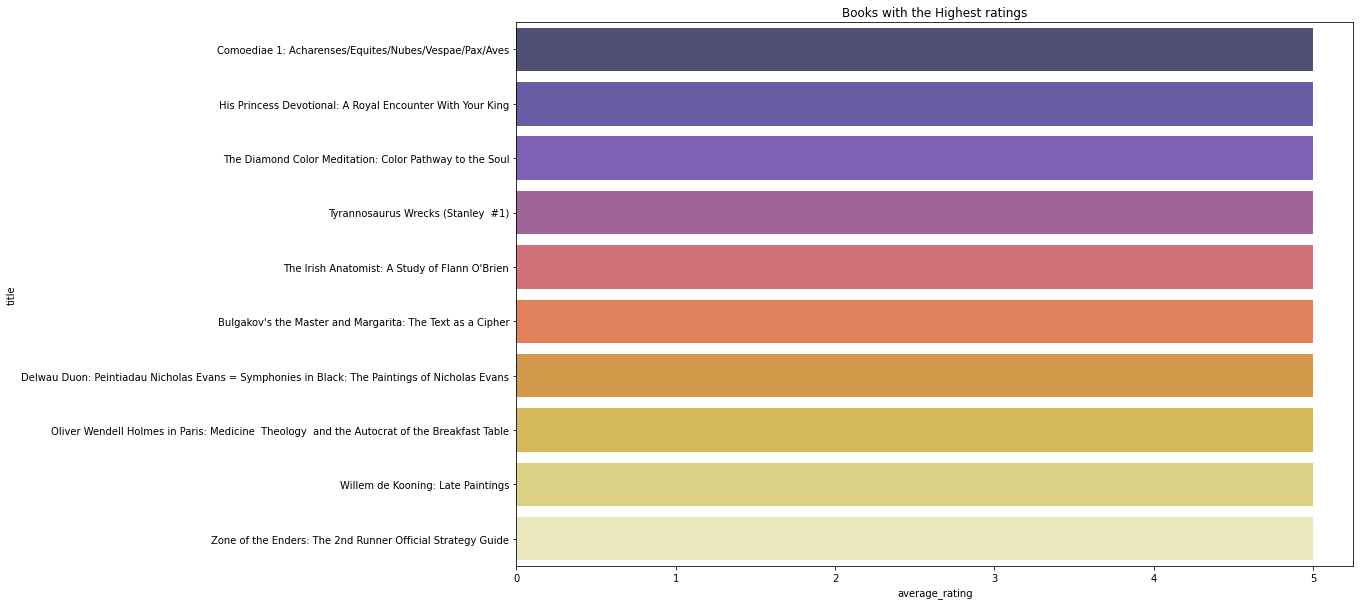

In [16]:
ratings = books.sort_values('average_rating', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(ratings['average_rating'], ratings.index, alpha=.8,palette='CMRmap').set_title("Books with the Highest ratings")

Here, we have the books that people have rated the most, that is the books the people of given ratings to the most(This could also mean the books people have read the most).

Text(0.5, 1.0, 'Most rated books')

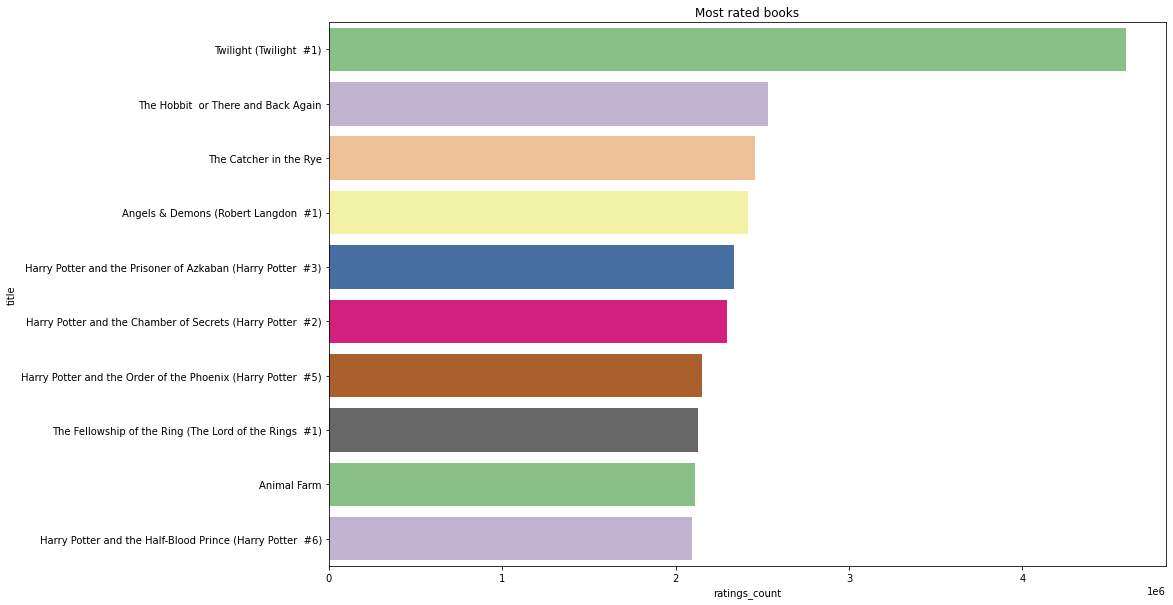

In [14]:
most_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Accent').set_title("Most rated books")

Lastly, we have the not so commonly used **pie chart** visualisation of the books with the most text reviews. Notice the some of the title that appear here are also title that appered in the most rated books

Text(0.5, 1.0, 'Books with the most text review')

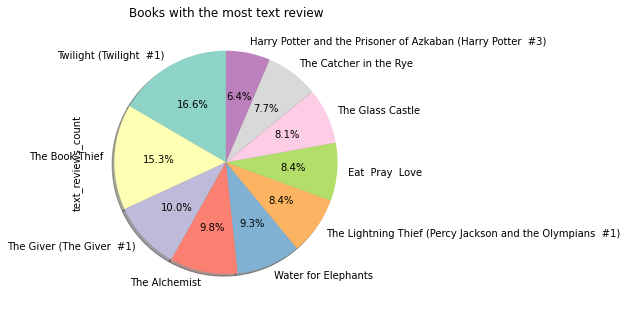

In [15]:
most_reviews = books.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
most_reviews["text_reviews_count"].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,      # add shadow        
                        colors = sns.color_palette('Set3')
                                       )

plt.title('Books with the most text review')# Sets the pie chart to look like a circle.